# Generating RGB composites of radar data #

The MeteoSwiss version of Py-ART now allows to create RGB composites of radar moments. The approach is based on the poster 

*Detecting severe storms using an RGB composite combining polarimetric radar parameters* by Bram van ´t Veen, Pieter Groenemeijer, Tomáš Púčik, European Severe Storms Laboratory, Vienna, 2025

https://presentations.copernicus.org/ECSS2025/ECSS2025-289_supplement.pdf

The idea is that 3 polarimetric variables are mapped to the R, G and B channels, which allows to highlight meteorological features in a single figure. The authors provide the following interpretation key

<img src="images/rgb_interpretation.png" alt="rgb_interpretation" width="600">

Radar moments first need to normaized to a [0-1] RGB space. The authors suggest this conversion table.


<img src="images/conversion_table.png" alt="conversion_table" width="400">

The alpha channel is used to decrease the visual impact of regions of low reflectivity. Without this additional transparency the composite image tends to be too green.


## Conversion table in Py-ART


The conversion table is implemented in the configuration file of Py-ART. By default it is the same as in the poster, namely.

```python
    DEFAULT_RGB_BOUNDS = {
        reflectivity: ((30, 60), (0, 1)),
        differential_reflectivity: ((0, 4), (0, 1)),
        cross_correlation_ratio:  ((1, 0.7), (0, 1)),
    }

    DEFAULT_RGB_ALPHA = {
        reflectivity: ((-10,0,10,15,20,24,28,31,34,37,40),(0.05,0.12,0.22,0.29,0.39,0.48,0.58,0.67,0.77,0.88,1))

    }
```

The best way to change the defaults it to make your own copy of the file https://github.com/MeteoSwiss/pyart/blob/master/pyart/default_config.py or https://github.com/MeteoSwiss/pyrad/blob/master/config/pyart/mch_config.py, edit the values there and then run:

    export PYART_CONFIG=<path_to_your_file>

Which will make Py-ART use it

## How to make RGB plots in Py-ART

It is very easy to make RGB plots in Py-ART, you only need to use the classical Py-ART plotting functions with three field names instead of a single one.

In [1]:
import pyart
import matplotlib.pyplot as plt


DATA_PATTERN="/store_new/mch/msrad/radar/rad4alp/rawdata/18162/MLD18162/MLD1816220550U.*"
# This function allows to read a pattern of files into a single radar object
radar = pyart.io.read_files(DATA_PATTERN, pyart.aux_io.read_metranet)


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



(-50.0, 50.0)

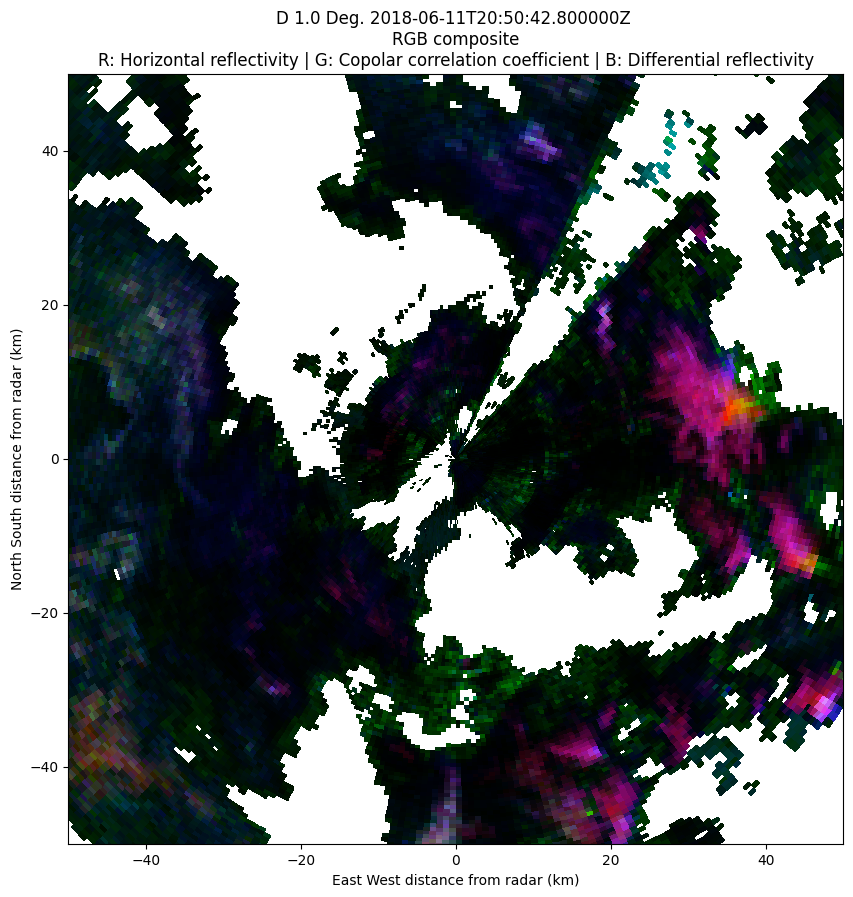

In [2]:
RGB_FIELDS = ("reflectivity", "uncorrected_cross_correlation_ratio", "differential_reflectivity")
display = pyart.graph.RadarDisplay(radar)

fig = plt.figure(figsize=(10,10))
display.plot_ppi(RGB_FIELDS, sweep=2)
plt.xlim([-50,50])
plt.ylim([-50,50])

Note that you need make sure that the variables used in the plot are keys of the DEFAULT_RGB_BOUNDS and that the first variable is a key of the DEFAULT_RGB_ALPHA dictionaries (you can always extend them in the config files). The assumptions made by Py-ART are the following:
1. The red color is associated to the first variable, green to the second and blue to the third.
2. The alpha channel is parameterized by the first variable

Feel free to test and find out new possibilites of RGB composites!

## Suported plots

Currently, the following Py-ART plotting functions support RGB plots:

* [pyart.graph.RadarDisplay.plot_ppi](https://meteoswiss.github.io/pyart/API/generated/pyart.graph.RadarDisplay.plot_ppi.html#pyart.graph.RadarDisplay.plot_ppi)
* [pyart.graph.RadarDisplay.plot_rhi](https://meteoswiss.github.io/pyart/API/generated/pyart.graph.RadarDisplay.plot_rhi.html#pyart.graph.RadarDisplay.plot_rhi)
* [pyart.graph.RadarDisplay.plot_xsection](https://meteoswiss.github.io/pyart/API/generated/pyart.graph.RadarDisplay.plot_xsection.html)
* [pyart.graph.RadarMapDisplay.plot_ppi_map](https://meteoswiss.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.plot_ppi_map.html)
* [pyart.graph.GridMapDisplay.plot_grid](https://meteoswiss.github.io/pyart/API/generated/pyart.graph.GridMapDisplay.plot_grid.html#pyart.graph.GridMapDisplay.plot_grid)

## Some examples

### Cross-section plot

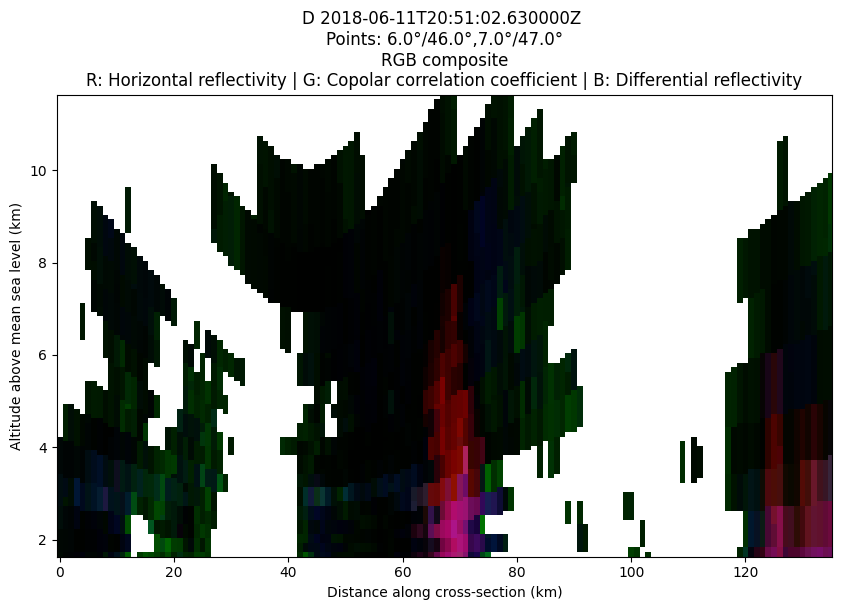

In [3]:
fig = plt.figure(figsize=(10,6))
COORDS=((6, 46),(7,47))
display.plot_xsection(RGB_FIELDS, ref_points=COORDS)

## PPI on a spatial map

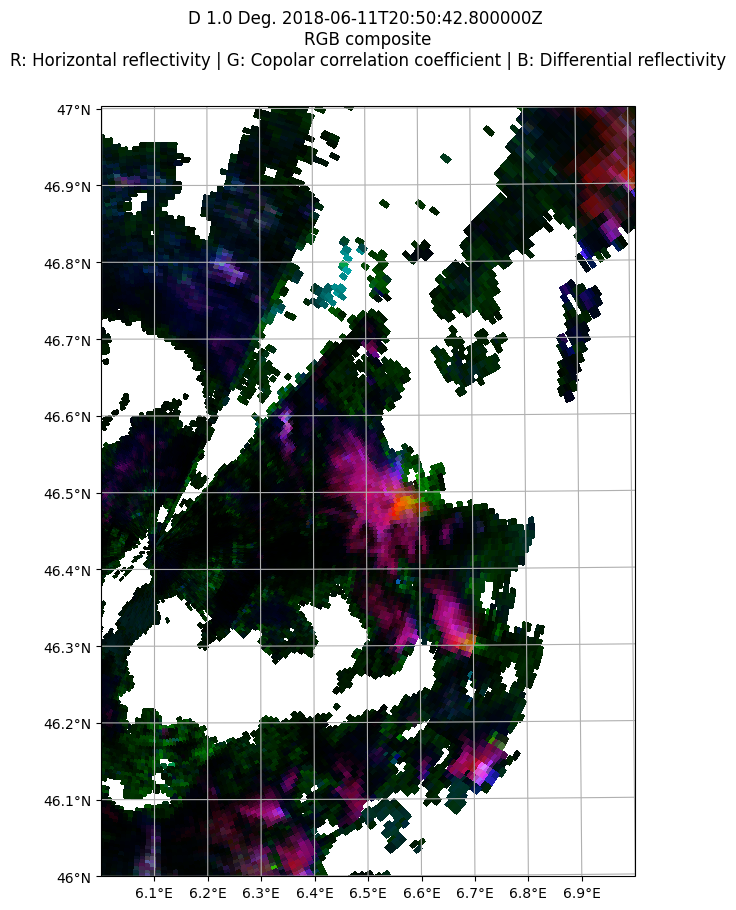

In [4]:
import numpy as np

display = pyart.graph.RadarMapDisplay(radar)
min_lon = 6
max_lon = 7
min_lat = 46
max_lat = 47
lonstep=latstep = 0.1
lon_lines = np.arange(min_lon, max_lon + lonstep, lonstep)
lat_lines = np.arange(min_lat, max_lat + latstep, latstep)
fig = plt.figure(figsize=(10,10))
display.plot_ppi_map(RGB_FIELDS, sweep=2, lon_lines=lon_lines, 
                     lat_lines=lat_lines,
                     min_lat=min_lat,
                     max_lat=max_lat,
                     min_lon=min_lon,
                     max_lon=max_lon)



## Grid map

45.70098978113134


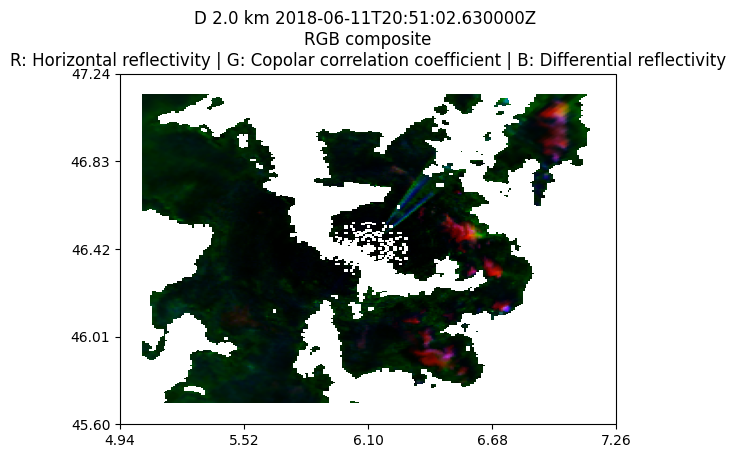

In [ ]:
grid = pyart.map.grid_from_radars(
    (radar,),
    grid_shape=(1, 241, 241),
    grid_limits=((2000, 2000), (-80000.0, 80000.0), (-80000.0, 80000.0)),
    fields=RGB_FIELDS,
)
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid(RGB_FIELDS, level = 0)